# Fun with Pandas

We will use data from the [ergast API](https://ergast.com/mrd/) for the following examples.

[Ergast Postman collection with documentation](https://documenter.getpostman.com/view/11586746/SztEa7bL)

## What's a Dataframe again?
A **DataFrame** is composed of one or more **Series**. 
The names of the **Series** form the column names, and the row labels form the **Index**.

You may create a Dataframe in multiple ways, i.e.
* data from a file - df.read_csv(...)
* data from an API - df = pd.Dataframe(json_payload)
* data from a db
* ...



In [ ]:
# first, install the requirements
%pip install -r ../requirements.txt >> results/requirements_log.txt

In [ ]:
# import the needed libraries
import requests
import pandas as pd
import numpy as np

In [ ]:
# analyse a sample

url = 'https://ergast.com/api/f1/2022.json'
r = requests.get(url)
j = r.json()

df = pd.DataFrame(j['MRData']['RaceTable']['Races'])

df.head()


In [ ]:
# pull the f1 2022 season races information from the ergast API

f1_races_2022 = {
    'season': [],
    'round': [],
    'circuit_id': [],
    'raceName': [],
    'url': [],
    'LAT': [],
    'LONG': [],
    'locality': [],
    'country': [],
    'date': [],
    'time': []
}

url = 'https://ergast.com/api/f1/2022.json'
r = requests.get(url)
print(r)
j = r.json()

for item in j['MRData']['RaceTable']['Races']:
    try:
        f1_races_2022['season'].append(int(item['season']))
        f1_races_2022['round'].append(int(item['round']))
        f1_races_2022['circuit_id'].append(item['Circuit']['circuitId'])
        f1_races_2022['raceName'].append(item['raceName'])
        f1_races_2022['url'].append(item['url'])
        f1_races_2022['LAT'].append(float(item['Circuit']['Location']['lat']))
        f1_races_2022['LONG'].append(float(item['Circuit']['Location']['long']))
        f1_races_2022['locality'].append(item['Circuit']['Location']['locality'])
        f1_races_2022['country'].append(item['Circuit']['Location']['country'])
        f1_races_2022['date'].append(item['date'])
        f1_races_2022['time'].append(item.get('time'))
    except Exception as e:
        print(f'Error adding item: {item}')
        print(e)
        raise

f1_races_2022 = pd.DataFrame(f1_races_2022)
f1_races_2022

In [ ]:
# in order not to stress the API, use the backup file for the historical data
f1_races = pd.read_csv('./resources/f1_races.csv', index_col=0)

In [ ]:
f1_races.head()

### Series

In [ ]:
f1_races.circuit_id

### Columns

In [ ]:
f1_races.columns

### Index

In [ ]:
f1_races.index

### Inspect the data

In [ ]:
f1_races.shape

### What are the column data types?

In [ ]:
f1_races.dtypes

### What does the data look like?

In [ ]:
f1_races.head(2)

In [ ]:
f1_races.tail(2)

### Information on the Dataframe

In [ ]:
f1_races.info()

In [ ]:
f1_races[['season', 'date', 'country']].head()

In [ ]:
f1_races[1068:1076]

### Indexing
Use `iloc[]` to select rows and columns by their positions:

In [ ]:
f1_races.iloc[1068:1076, [0, 2, 5, 6]]

Use `loc[]` to select by name:

In [ ]:
f1_races.loc[1068:1076, 'season':'circuit_id']


### Filtering
A **Boolean mask** is a array-like structure of Boolean values – it's a way to specify which rows/columns we want to select (True) and which we don't (False).

In [ ]:
f1_races[f1_races['season'] == 2022]

In [ ]:
f1_races[(f1_races['season'] == 2022) & (f1_races['date'] < '2022-09-01')]

We can also use query instead:

In [ ]:
f1_races.query("`season` == 2022 and `date` < '2022-09-01'")

### Statistics

In [ ]:
# how many races were held in each country throughout the years?
f1_races.country.value_counts()

In [ ]:
# how many circuits in each season?
f1_races.season.value_counts()

In [ ]:
# how many circuits between 1955 and 1975?
f1_races[(f1_races['date'] >= '1955') & (f1_races['date'] <= '1975')].season.value_counts().sum()

### Continue with the race results

In [ ]:
# analyse a sample
url = 'https://ergast.com/api/f1/2022/12/results.json'
r = requests.get(url)
j = r.json()

df = pd.DataFrame(j['MRData']['RaceTable']['Races'][0]['Results'])

df.head()

In [ ]:
# get the latest race's results

f1_results_latest = {
    'season': [],
    'Round': [],
    'date': [],
    'circuit_id': [],
    'driver': [],
    'DATE_of_birth': [],
    'nationality': [],
    'constructor': [],
    'GriD': [],
    'tIME': [],
    'Status': [],
    'points': [],
    'podium': []
}

url_latest = 'https://ergast.com/api/f1/current/last/results.json'
r = requests.get(url_latest)
print(r)
j = r.json()

try:
    for item in j['MRData']['RaceTable']['Races'][0]['Results']:
        try:
            f1_results_latest['season'].append(int(j['MRData']['RaceTable']['Races'][0]['season']))
            f1_results_latest['Round'].append(int(j['MRData']['RaceTable']['Races'][0]['round']))
            f1_results_latest['date'].append(j['MRData']['RaceTable']['Races'][0]['date'])
            f1_results_latest['circuit_id'].append(j['MRData']['RaceTable']['Races'][0]['Circuit']['circuitId'])
            f1_results_latest['driver'].append(item['Driver']['driverId'])
            f1_results_latest['DATE_of_birth'].append(item['Driver']['dateOfBirth'])
            f1_results_latest['nationality'].append(item['Driver']['nationality'])
            f1_results_latest['constructor'].append(item['Constructor']['constructorId'])
            f1_results_latest['GriD'].append(int(item['grid']))
            f1_results_latest['tIME'].append(int((item.get('Time') or {}).get('millis')) 
        if bool((item.get('Time') or {}).get('millis')) else None)
            f1_results_latest['Status'].append(item['status'])
            f1_results_latest['points'].append(item['points'])
            f1_results_latest['podium'].append(int(item['position']))
        except Exception as e:
            print(f'Error adding item: {item}')
            print(e)
            raise
except IndexError:
    print(f'Race has not happened yet... ')


f1_results_latest = pd.DataFrame(f1_results_latest)

f1_results_latest.head()

In [ ]:
# in order not to stress the API, use the backup file for the historical data

f1_results = pd.read_csv('./resources/f1_results.csv', index_col=0)

# the code that generated the backup files is available in the resouces section


In [ ]:
f1_results.head()

In [ ]:
# find the dimensions (number of rows, number of columns) in the data
f1_results.shape

In [ ]:
# calculate summary statistics for nationality and points (median)
f1_results[['nationality', 'points']].groupby('nationality').describe()

In [ ]:
# isolate the date, race name, driver and constructor for the 1999 season
f1_results.query("`season` == 1999")[['date', 'circuit_id', 'driver', 'constructor']]

In [ ]:
# how many wins for McLaren between 1975 and 1985?
f1_results[(f1_results['constructor'] == 'mclaren') & (f1_results['season'] >= 1975) & (f1_results['season'] >= 1975) & (f1_results['season'] <= 1985) & (f1_results['podium'] == 1)].value_counts().sum()


## Data cleaning

We'll be looking at creating, renaming, and dropping columns, type conversion and sorting - which will make working with this data easier

### Dropping columns
Our dataset may contain information that is not of interest for our analysis.

In [ ]:
# from the f1_races df, let's remove the url column
mask = f1_races.columns.str.contains('url$', regex=True)
columns_to_drop = f1_races.columns[mask]
columns_to_drop

In [ ]:
f1_races = f1_races.drop(columns=columns_to_drop)
f1_races.head()

In [ ]:
# another way to do this is to select what we want to keep
mask = f1_races.columns.str.contains('url$|round', regex=True)
f1_races.loc[:,~mask]

In [ ]:
# or simply
f1_races.drop('time', axis=1, inplace=True)

In [ ]:
f1_races.head()

### Renaming columns
Some of the columns have weird names. Let's fix that.

In [ ]:
f1_races.rename(
    columns={
        'raceName': 'race_name'
    },
    inplace=True # careful with this!
)
f1_races.columns

### Type conversion
Is there something weird about these columns?

In [ ]:
f1_races.dtypes

In [ ]:
# date should be stored as datetime!
f1_races.loc[:, ['date']] = f1_races.loc[:, ['date']].apply(pd.to_datetime)
f1_races.dtypes

In [ ]:
# or
f1_races.loc[:, ['date']].astype({'date': 'datetime64[ns]'}).dtypes

### Creating new columns
Let's create a 'race_month' column.

In [ ]:
f1_races = f1_races.assign(
    race_month=lambda x: x.date.dt.month_name()
)

You can read more about Python lambda functions [here](https://realpython.com/python-lambda/).

In [ ]:
f1_races.head()

### Sorting

In [ ]:
f1_races.sort_values(['race_name', 'date'], ascending=[False, True]).head()


In [ ]:
f1_races.nlargest(3, 'date')

In [ ]:
f1_races.nsmallest(3, 'date')


## Working with the index
We haven't really worked with the index because it's just been a row number; however, we can change the values we have in the index to access additional features of the pandas library.

### Setting and sorting the index
Currently, we have a RangeIndex, but we can switch to a DatetimeIndex by specifying a datetime column when calling set_index():

In [ ]:
f1_races.set_index('date', inplace=True)
f1_races.head(3)

In [ ]:
f1_races.sort_index(inplace=True, ascending=False)
f1_races.head()

`f1_races.sort_index(axis=1)` will sort the columns by name. 

The axis parameter is present throughout the pandas library: axis=0 targets rows and axis=1 targets columns.

In [ ]:
f1_races['2022-10-23':'2022-11-20']


In [ ]:
# when not specifying a range
f1_races.loc['2022-10-30']

In [ ]:
f1_races.sort_index(inplace=True, ascending=True)
f1_races.head()

### Resetting the index


In [ ]:
f1_races.reset_index(inplace=True)
f1_races.head()

### Reshaping the data


In [ ]:
# lowercase all column names so the dataset is easier to work with
f1_races = f1_races.rename(columns=lambda x: x.lower())
f1_races.head()

## Data visualisation

## Plotting with pandas

To embed SVG-format plots in the notebook, we will also call the %config and %matplotlib `inline` magics:

In [ ]:
%config InlineBackend.figure_formats = ['svg']

You can read more about magics [here](https://ipython.readthedocs.io/en/stable/interactive/magics.html).

In [ ]:
# the plot() method will generate line plots for all numeric columns by default
f1_races.plot(title='not very helpful', ylabel='year', alpha=1)

The `plot()` method returns an Axes object that can be modified further (e.g., to add reference lines, annotations, labels, etc.). Let's walk through an example.

In [ ]:
f1_races.head()

In [ ]:
f1_races.tail(104)

In [ ]:
# bar plots would be more useful for this dataset
f1_races.set_index('date', inplace=True)
plot_data = f1_races['2018-03-25':'2022-11-20']\
    .assign(race_month_order=lambda x: x.index.month)\
    .pivot_table(index='race_month_order', columns='season', values='round', aggfunc='count')

f1_races.reset_index(inplace=True)
plot_data.head(10)
# plot_data.info()


In [ ]:
ax = plot_data.plot(
    kind='bar', rot=0, xlabel='', ylabel='rounds',
    figsize=(8, 1.5), title='f1_races per month'
)

# customize the legend
ax.legend(title='', loc='center', bbox_to_anchor=(-0.2, 0.5), ncol=1)

# Let's find out some stuff
Using the `f1_results` dataset.

In [ ]:
# first, clean up the data in the f1_results dataframe
f1_results.dtypes

f1_results.loc[:, ['date']] = f1_results.loc[:, ['date']].apply(pd.to_datetime)
f1_results.loc[:, ['DATE_of_birth']] = f1_results.loc[:, ['DATE_of_birth']].apply(pd.to_datetime)

f1_results.dtypes

# lowercase all the columns so that they are easier to use

f1_results.columns = f1_results.columns.str.lower()

In [ ]:
# what columns are in this dataset?
f1_results.columns
f1_results.iloc()

In [ ]:
# how many distinct drivers are in the dataset?
res = f1_results.drop_duplicates(subset=["driver"])
res.count()

In [ ]:
# which of those drivers are Austrian?
res[res["nationality"] == "Austrian"]["driver"]

In [ ]:
# what are the results from the latest race?
res = f1_results[f1_results["date"] == f1_results["date"].max()]
print(res)
# hint: you may use the date column; convert it to datetime first!

In [ ]:
# who won the race? how many races has this pilot won this year?
f1_results.head()

# hints:
# get the winner by filtering f1_results on 'date' and 'podium';
# then use iloc[i][j] to access the first (and only) row (i) of the dataframe and the 'driver' column (j)
# winner = f1_results[ ... filters ... ].iloc[i][j]


# use this ^ to filter f1_results on season, podium and driver
# and then count


In [ ]:
# on which circuit did Lewis Hamilton have the most wins?
res = f1_results[(f1_results['podium'] == 1) & (f1_results['driver'] == 'hamilton')]['circuit_id'].value_counts().idxmax()
print(res)

# Formula 1 Driver Career Analysis
Let't analyse the career of one of the most succesful F1 drivers of all time.

Pick a driver from the list in [this article](https://www.redbull.com/ca-en/best-f1-drivers-of-all-time) and analyse their career below.

Or you can pick your favourite driver instead =)

In [121]:
# look for your driver's id in the list
f1_results['driver'].unique()

array(['farina', 'fagioli', 'reg_parnell', 'cabantous', 'rosier',
       'gerard', 'harrison', 'etancelin', 'hampshire', 'fry',
       'shawe_taylor', 'claes', 'fangio', 'kelly', 'bira', 'murray',
       'crossley', 'graffenried', 'chiron', 'martin', 'peter_walker',
       'rolt', 'leslie_johnson', 'ascari', 'sommer', 'villoresi',
       'gonzalez', 'manzon', 'trintignant', 'rol', 'schell', 'whitehead',
       'pian', 'parsons', 'holland', 'rose', 'green', 'bettenhausen',
       'chitwood', 'wallard', 'faulkner', 'george_connor', 'paul_russo',
       'flaherty', 'fohr', 'darter', 'hellings', 'mcgrath', 'ruttman',
       'hartley', 'davies', 'mcdowell', 'walt_brown', 'webb', 'hoyt',
       'ader', 'holmes', 'rathmann', 'banks', 'schindler', 'levrett',
       'cantrell', 'agabashian', 'bonetto', 'pagani', 'branca', 'levegh',
       'chaboud', 'pozzi', 'serafini', 'guy_mairesse', 'taruffi',
       'biondetti', 'louveau', 'comotti', 'sanesi', 'pietsch', 'moss',
       'fischer', 'abecassis

In [139]:
# which driver have you chosen?
driver = 'leclerc'

# what nationality is this driver?
nationality = f1_results[f1_results['driver'] == driver]['nationality'].unique()
print(f"{driver}'s nationality is {nationality[0]}")


leclerc's nationality is Monegasque


In [ ]:
# when was his first race and for which constructor?
races = f1_results[f1_results["driver"] == driver].sort_values(["date"], ascending=[True])[["circuit_id", "date", "constructor"]]
first_race_date = races.iloc[0][1]
first_race_constructor = races.iloc[0][2]
print(f"{driver}'s first race was on {first_race_date} with {first_race_constructor}")

In [ ]:
# when was his first podium + with which constructor?
# keep in mind the driver may have been on the podium 0 times
podiums = f1_results[(f1_results["driver"] == driver) & ((f1_results["podium"] == 1) | (f1_results["podium"] == 2) | (f1_results["podium"] == 3))].sort_values(["date"], ascending=[True])[["podium", "constructor", "date"]]
first_podium_date = podiums.iloc[0]["date"] if podiums.empty is False else "<no podiums yet>"
first_podium_constructor = podiums.iloc[0]["constructor"] if podiums.empty is False else "<no podiums yet>"
print(f"{driver}'s first podium was on {first_podium_date} with {first_podium_constructor}")

In [152]:
# what about his first win + with which constructor + which circuit?
# keep in mind the driver may have won 0 races
won_races = f1_results[(f1_results["driver"] == driver) & (f1_results["podium"] == 1)].sort_values(["date"], ascending=[True])[["podium", "constructor", "circuit_id", "date"]]
first_win = won_races.iloc[0] if won_races.empty is False else "<no wins yet>"
first_win_date = won_races.iloc[0]["date"] if won_races.empty is False else "<no wins yet>"
first_win_constructor = won_races.iloc[0]["constructor"] if won_races.empty is False else "<no wins yet>"
first_win_circuit = won_races.iloc[0]["circuit_id"] if won_races.empty is False else "<no wins yet>"

print(f"{driver}'s first win was on {first_win_date} with {first_win_constructor} at {first_win_circuit}")

leclerc's first win was on 2019-09-01 00:00:00 with ferrari at spa


In [ ]:
# how many race starts?
# hint: check the Status is NOT one of Did not qualify, Did not prequalify, Not classified
race_starts = f1_results[(f1_results["driver"] == driver) & (~f1_results["status"].isin(["Did not qualify", "Did not prequalify", "Not classified"]))].value_counts().sum()
print(f"{driver} has {race_starts} race starts")

In [ ]:
# how many of those races did he actually finished?
# hint: look for Status Finished; for this exercise, we'll not consider other statuses as successful
races_finished = f1_results[(f1_results["driver"] == driver) & (f1_results["status"] == "Finished")].value_counts().sum()
print(f"{driver} has finished {races_finished} races")

In [ ]:
# how many has he won?
races_won = f1_results[(f1_results["driver"] == driver) & (f1_results["podium"] == 1)].value_counts().sum()
print(f"{driver} has won {races_won} races")

In [178]:
# create a dataframe that contains the follwing information:
#
# driver
# nationality
# season
# circuit_id
# race_started (Boolean)
# race_finished (Boolean)
# race_won (Boolean)
# constructor

f1_results.head(100)
f1_career = {'driver': f1_results[f1_results["driver"] == driver]["driver"],
             'nationality': f1_results[f1_results["driver"] == driver]["nationality"],
             'season': f1_results[f1_results["driver"] == driver]["season"],
             'circuit_id': f1_results[f1_results["driver"] == driver]["circuit_id"],
             'race_started': [status not in ["Did not qualify", "Did not prequalify", "Not classified"] for status in list(f1_results[f1_results["driver"] == driver]["status"])],
             'race_finished': [status == "Finished" for status in list(f1_results[f1_results["driver"] == driver]["status"])],
             'race_won': [podium == 1 for podium in list(f1_results[f1_results["driver"] == driver]["podium"])],
             'constructor': f1_results[f1_results["driver"] == driver]["constructor"]
            }

f1_career = pd.DataFrame(f1_career)
f1_career.head()

,driver,nationality,season,circuit_id,race_started,race_finished,race_won,constructor
23339,leclerc,Monegasque,2018,albert_park,True,True,False,sauber
23358,leclerc,Monegasque,2018,bahrain,True,False,False,sauber
23385,leclerc,Monegasque,2018,shanghai,True,True,False,sauber
23392,leclerc,Monegasque,2018,baku,True,True,False,sauber
23416,leclerc,Monegasque,2018,catalunya,True,False,False,sauber


## Plotting the results

In [179]:
# plot the race results per season

# prep the data
f1_career['race_started'] = f1_career['race_started'].astype(int)
f1_career['race_finished'] = f1_career['race_finished'].astype(int)
f1_career['race_won'] = f1_career['race_won'].astype(int)

plot_data_wins = f1_career.pivot_table(index="season", columns="driver", values="race_won", aggfunc="sum")
plot_data_start = f1_career.pivot_table(index="season", columns="driver", values="race_started", aggfunc="sum")

<AxesSubplot:title={'center':"leclerc's F1 Wins"}, xlabel='season', ylabel='races'>

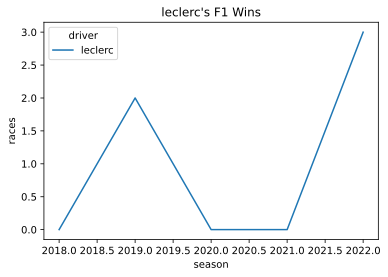

In [180]:
plot_data_wins.plot(title=f"{driver}'s F1 Wins", ylabel="races")

<AxesSubplot:title={'center':"leclerc's F1 Race Starts"}, xlabel='season', ylabel='races'>

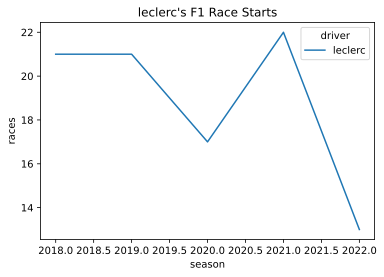

In [181]:
plot_data_start.plot(title=f"{driver}'s F1 Race Starts", ylabel="races")

### Combine the plots

In [182]:
from functools import reduce

plot_data = reduce(lambda  left,right: pd.merge(left,right,on=["season"], how='inner'), [plot_data_start, plot_data_wins])
plot_data.rename(
    columns={
        f"{driver}_x": "starts",
        f"{driver}_y": "wins"
    }, inplace=True)
plot_data.head()

driver,starts,wins
season,,
2018,21,0
2019,21,2
2020,17,0
2021,22,0
2022,13,3


<AxesSubplot:title={'center':"leclerc's F1 Career"}, xlabel='season', ylabel='races'>

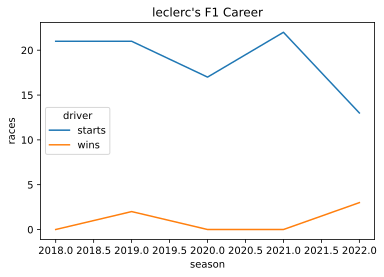

In [183]:
plot_data.plot(title=f"{driver}'s F1 Career", ylabel="races")

### Export the results

In [184]:
# explore more possibilities to store the results, e.g. to_sql()
f1_career.to_csv(f"./results/f1_career_{driver}.csv", index=False)

# Further reading
* [Loading a Dataframe from a SQL database](https://pythonspeed.com/articles/pandas-sql-chunking/)
* [Connecting to Redshift from Python](https://docs.aws.amazon.com/redshift/latest/mgmt/python-connect-examples.html)
* [Pandas I/O](https://pandas.pydata.org/docs/reference/io.html)